# ``wedge`` class

This is a counterpart to the ``annulus`` class; while the ``annulus`` contains spectra from pixels within a masked annular area, the ``wedge`` contains spectra from pixels within a masked wedge-shaped area. 

Potential use cases might be similar to those one takes a PV slice across a disk major or minor axis. The utility in the ``wedge`` approach though comes from being able to curve the wedge to lie on an emission surface, using the ``get_mask`` infrastructure.

Since it's a wedge with a finite *annular* width, there are less pixels or spectra in the inner radial regions than the outer ones. Resulting PV diagrams (like in the gif below) can show odd plotting/pcolormesh artifacts, depending on how the angular domain of the wedge compares to the regular pixel grid.

<img src="./mountainplot.gif">

Here's a quick example of how to generate a ``wedge`` instance. 

## ``wedge``

Define the path to the data cube:

In [1]:
filename = 'path/to/ALMA/data/cube/fitsfile' # Placeholder

Import the ``linecube`` class from ``eddy``:

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from eddy import linecube

Load up the data:

In [3]:
cube = linecube(filename+'.fits', FOV=20.0, velocity_range=[5850-3000, 5850+3000])

Define two geometric properties of the disk: the inclination ``inc`` and the position angle ``PA``:

In [4]:
inc = -23.2   # [deg] Negative inclination means counter-clockwise rotation
PA  = 236.7   # [deg] Measured counterclockwise to redshifted major axis

As described above, a ``wedge`` can be defined to lie on a specified emission surface. Here we just use a flat one:

In [5]:
z0          = 0.
psi         = 1.0
r_taper     = np.inf
r_cavity    = 0.
q_taper     = 1.0

Finally, we set some geometric parameters of the ``wedge``. 

In [6]:
phi_min     = 0.         # [deg] Defined counterclockwise of the redshifted major axis
phi_max     = 0.5        # [deg] Defined counterclockwise of the redshifted major axis
dr          = cube.dpix  # [arcsec] Optional; if defined, spectra will be gridded onto a regular radial grid
r_min       = 0.         # [arcsec] Inner radius of the wedge
r_max       = 10.        # [arcsec] Outer radius of the wedge

With the above parameters set, we can generate a ``wedge`` instance:

In [7]:
wedge = cube.get_wedge(phi_min=phi_min, phi_max=phi_max, dr=dr, r_min=r_min, r_max=r_max, inc=inc, PA=PA, 
                       z0=z0, psi=psi, r_cavity=r_cavity, r_taper=r_taper, q_taper=q_taper)

There is a convenience function, ``plot_mountain()``, to display the spectra as a PV diagram (named as such as homage to the ``annulus``'s ``plot_river()`` function). Because we set ``phi_max, phi_min = 0, 0.5``, we will see spectra from close to the redshifted major axis. 

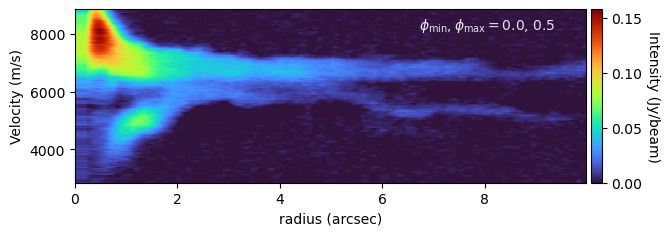

In [8]:
wedge.plot_mountain()